In [ ]:
!pip install geopandas

In [210]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.metrics import mean_squared_error, r2_score

import openpyxl
import os

from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import PatternFill
from openpyxl.formatting.rule import ColorScaleRule
from openpyxl.utils import get_column_letter
from openpyxl import load_workbook


# Análisis Metropolitano

## Tratar DB

In [211]:
# subir pgkg
# Seleccionar nivel de deshabitación: a,b,c,d
#Limpiar columnas no-numéricas


MAPA_ruta = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\DENUE_LOC_NAC\resultados_metropoli.xlsx"
MAPA_df = pd.read_excel(MAPA_ruta)

In [212]:
# #limpiar columnas
# MAPA_df_continuo = MAPA_df.drop(columns=['CVE_MET', 'NOM_MET', 'TIPO_MET','CVEPOP', 'CVEVIV', 'CVE',
#        'TIPOLOGIA','R_DESHAB_2010', 'R_DESHAB_2020', 'SUBTIPOLOGÍA', 'CVE_EMP',
#        'CVE_UEC', 'CVE_ue', 'TIPOLOGIA_ue',  'R_TAM', 'SUBTIPOLOGÍA_ue'])

#seleccionar micro-db de cada nivel de deshabitación
MAPA_df_a = MAPA_df[MAPA_df.R_DESHAB_2020 == 'a']
MAPA_df_b = MAPA_df[MAPA_df.R_DESHAB_2020 == 'b']
MAPA_df_c = MAPA_df[MAPA_df.R_DESHAB_2020 == 'c']
MAPA_df_d = MAPA_df[MAPA_df.R_DESHAB_2020 == 'd']

print("FULL: ",len(MAPA_df))
print("DESHAB A: ",len(MAPA_df_a))
print("DESHAB B: ",len(MAPA_df_b))
print("DESHAB C: ",len(MAPA_df_c))
print("DESHAB D: ",len(MAPA_df_d))

FULL:  92
DESHAB A:  1
DESHAB B:  50
DESHAB C:  41
DESHAB D:  0


## Análisis correlacional simple

In [213]:
# Especificar el archivo de salida y el nombre de la hoja
excel_file = r"C:\Users\Alejandro\Downloads\DATA\Factorial\Nacional\Nacional_Correlacional_Metro.xlsx"
sheet_name = 'Correlaciones'
sheet_name_2 = 'Correlaciones Significativas'

,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,TVIVPARHAB2020,...,TASA_EMP_MET,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
POPTOT2010,1.000000,0.998752,0.999499,0.997834,0.999748,0.998630,0.999530,0.997975,0.999749,0.998631,...,-0.049914,0.980745,0.978645,-0.056198,-0.073880,NaN,0.370536,0.392032,0.229420,0.267695
POPTOT2020,0.998752,1.000000,0.998604,0.999474,0.998062,0.999769,0.998699,0.999488,0.998061,0.999768,...,-0.035712,0.987928,0.980091,-0.042977,-0.064493,NaN,0.378338,0.394173,0.223404,0.259084
VIVTOT2010,0.999499,0.998604,1.000000,0.998510,0.999675,0.998977,0.999992,0.998601,0.999671,0.998978,...,-0.051158,0.980576,0.975703,-0.057313,-0.080160,NaN,0.370048,0.391749,0.221404,0.261280
VIVTOT2020,0.997834,0.999474,0.998510,1.000000,0.997380,0.999646,0.998586,0.999972,0.997378,0.999645,...,-0.037736,0.987889,0.977499,-0.044701,-0.070253,NaN,0.382161,0.398436,0.220723,0.258270
TVIVHAB2010,0.999748,0.998062,0.999675,0.997380,1.000000,0.998361,0.999677,0.997500,1.000000,0.998363,...,-0.051131,0.978572,0.976104,-0.057149,-0.076938,NaN,0.367722,0.389704,0.225377,0.264392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP20,0.370536,0.378338,0.370048,0.382161,0.367722,0.378054,0.370560,0.382866,0.367739,0.378026,...,0.087332,0.418169,0.407657,0.081096,0.068605,NaN,1.000000,0.937608,0.782125,0.781128
DENS_EMP10,0.392032,0.394173,0.391749,0.398436,0.389704,0.393957,0.392097,0.399426,0.389719,0.393931,...,-0.253865,0.400050,0.398858,-0.254854,-0.188082,NaN,0.937608,1.000000,0.770321,0.841140
DENS_UEC20,0.229420,0.223404,0.221404,0.220723,0.225377,0.219308,0.221786,0.221828,0.225421,0.219293,...,-0.010861,0.225982,0.278024,-0.020187,0.192943,NaN,0.782125,0.770321,1.000000,0.961201


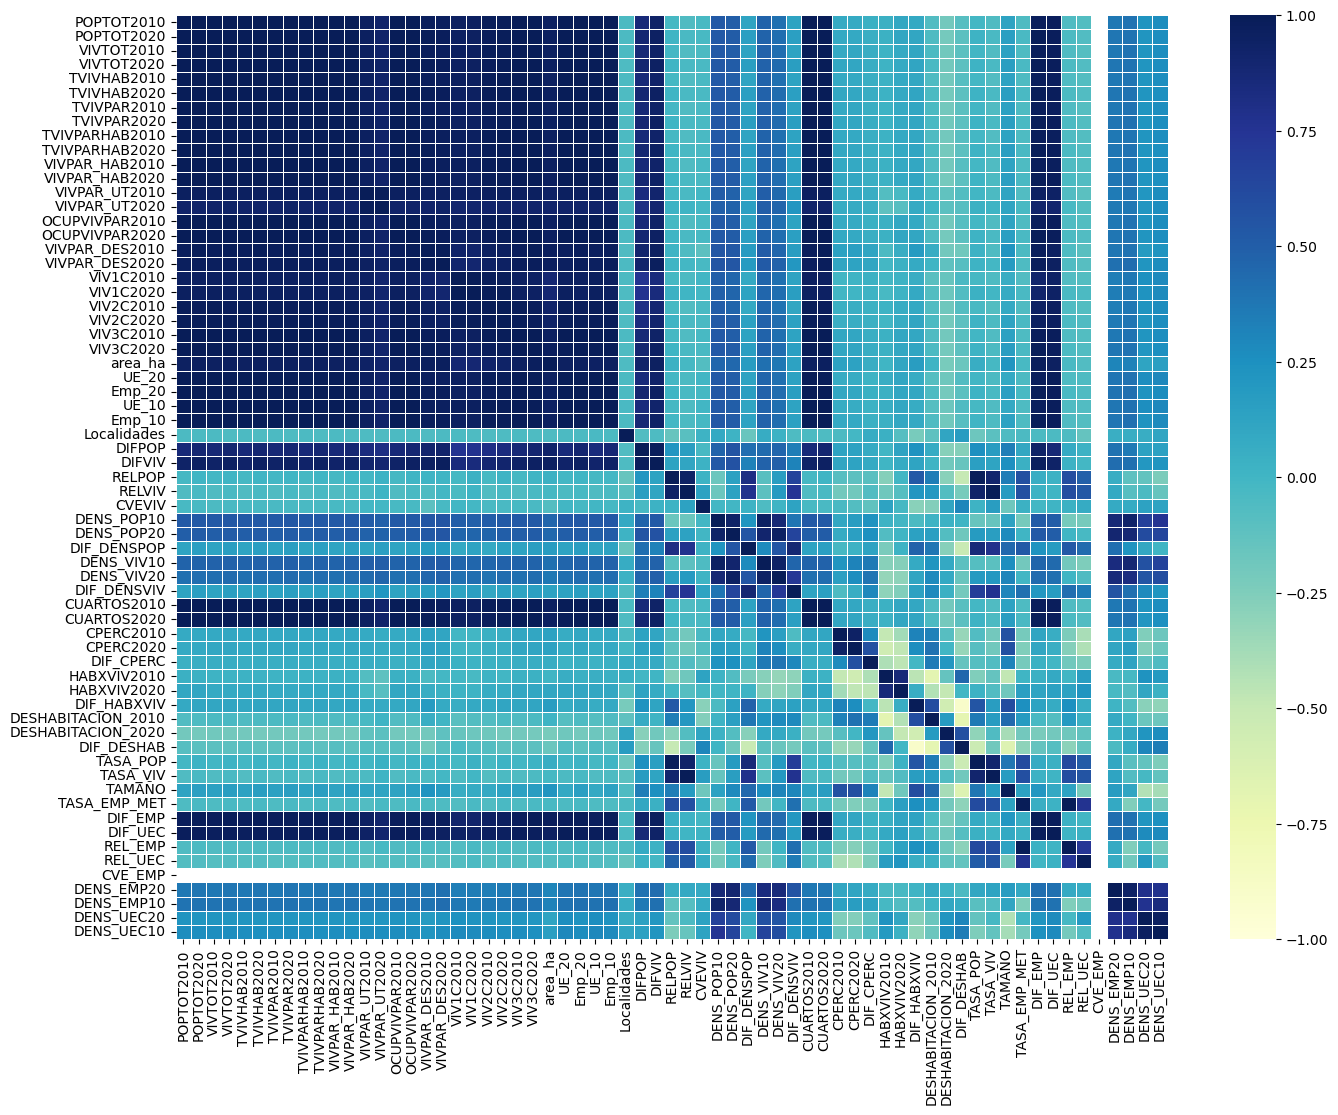

In [214]:
#df a analizar
MAPA_CM_f = MAPA_df

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(16, 12))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

In [215]:
# Guardar las correlaciones en un archivo Excel
with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
    correlaciones.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
    
    # Agregar título a la tabla de correlaciones
    worksheet = writer.sheets[sheet_name]
    worksheet.cell(row=1, column=1, value='Cuadro de Correlaciones')

print("El archivo Excel ha sido creado y las correlaciones han sido guardadas exitosamente.")


El archivo Excel ha sido creado y las correlaciones han sido guardadas exitosamente.


In [216]:
# Umbral de correlaciones significativas
threshold = 0.80

# Verificar si el archivo ya existe
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        # Cargar el libro de trabajo existente
        book = writer.book
        
        # Si la hoja ya existe, mostrar mensaje
        if sheet_name_2 in book.sheetnames:
            print(f"La hoja {sheet_name_2} ya existe en el archivo {excel_file}.")
        else:
            # Filtrar las correlaciones significativas
            correlaciones = pd.read_excel(excel_file, sheet_name=sheet_name, index_col=0)
            significativas = correlaciones[(correlaciones > threshold) | (correlaciones < -threshold)]
            
            # Guardar las correlaciones significativas en una nueva pestaña
            significativas.to_excel(writer, sheet_name=sheet_name_2, startrow=0, index=True)

            # Obtener la hoja de trabajo
            worksheet = writer.sheets[sheet_name_2]

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Necesario para evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a la tabla de correlaciones
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']

            print(f"Las correlaciones significativas han sido guardadas exitosamente en la nueva pestaña {sheet_name_2}.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Las correlaciones significativas han sido guardadas exitosamente en la nueva pestaña Correlaciones Significativas.


### Por deshab

,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,TVIVPARHAB2020,...,TASA_EMP_MET,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
POPTOT2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POPTOT2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIVTOT2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIVTOT2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TVIVHAB2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_UEC20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


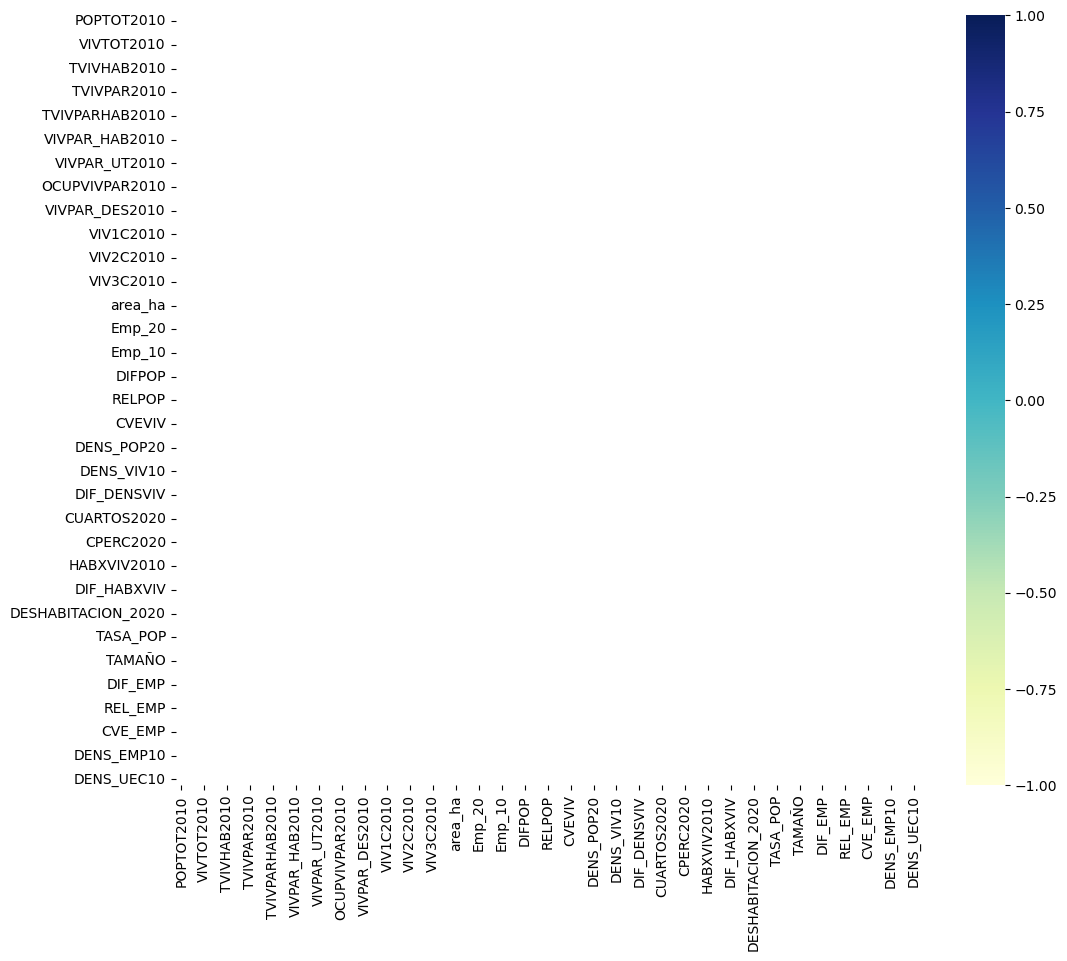

In [217]:
#df a analizar
MAPA_CM_f = MAPA_df_a

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()


,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,TVIVPARHAB2020,...,TASA_EMP_MET,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
POPTOT2010,1.000000,0.999041,0.999719,0.998341,0.999780,0.999034,0.999742,0.998452,0.999780,0.999035,...,-0.100425,0.984338,0.983048,-0.103705,-0.134040,NaN,0.495998,0.540713,0.339011,0.414756
POPTOT2020,0.999041,1.000000,0.998965,0.999761,0.998363,0.999817,0.999042,0.999808,0.998363,0.999817,...,-0.087308,0.990342,0.983736,-0.091138,-0.128981,NaN,0.505621,0.545263,0.335419,0.409940
VIVTOT2010,0.999719,0.998965,1.000000,0.998646,0.999801,0.999294,0.999996,0.998722,0.999797,0.999295,...,-0.097410,0.984506,0.980834,-0.100596,-0.137362,NaN,0.491916,0.535495,0.329181,0.405231
VIVTOT2020,0.998341,0.999761,0.998646,1.000000,0.997760,0.999827,0.998724,0.999982,0.997758,0.999827,...,-0.082874,0.991125,0.981974,-0.086545,-0.129441,NaN,0.505409,0.543327,0.329353,0.403838
TVIVHAB2010,0.999780,0.998363,0.999801,0.997760,1.000000,0.998702,0.999801,0.997848,1.000000,0.998703,...,-0.099760,0.982271,0.980741,-0.102714,-0.135666,NaN,0.489652,0.534400,0.332734,0.408611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP20,0.495998,0.505621,0.491916,0.505409,0.489652,0.502101,0.492752,0.505491,0.489680,0.502075,...,0.061262,0.543549,0.537609,0.053005,0.083848,NaN,1.000000,0.946738,0.777407,0.796934
DENS_EMP10,0.540713,0.545263,0.535495,0.543327,0.534400,0.541292,0.536222,0.543912,0.534421,0.541266,...,-0.252503,0.557874,0.561115,-0.258035,-0.156265,NaN,0.946738,1.000000,0.766515,0.844441
DENS_UEC20,0.339011,0.335419,0.329181,0.329353,0.332734,0.329195,0.329731,0.329879,0.332789,0.329181,...,-0.031189,0.335970,0.392341,-0.040961,0.232648,NaN,0.777407,0.766515,1.000000,0.969179


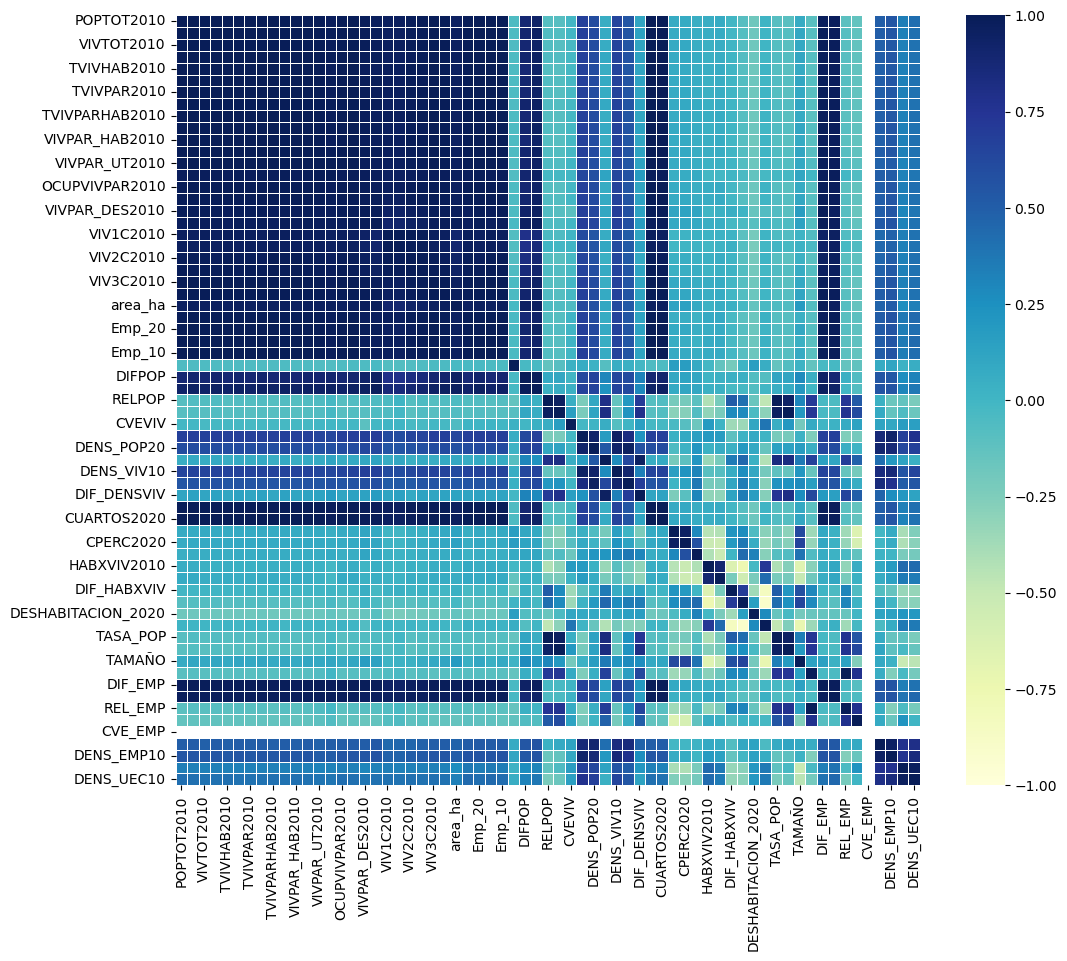

In [218]:
#df a analizar
MAPA_CM_f = MAPA_df_b

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,TVIVPARHAB2020,...,TASA_EMP_MET,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
POPTOT2010,1.000000,0.995011,0.991050,0.985541,0.996534,0.991471,0.991538,0.984790,0.996526,0.991473,...,-0.226608,0.782098,0.619884,-0.227775,-0.198083,NaN,0.250516,0.320342,-0.025338,0.033183
POPTOT2020,0.995011,1.000000,0.985846,0.989160,0.990594,0.995550,0.985673,0.989385,0.990581,0.995540,...,-0.189287,0.813705,0.655757,-0.194550,-0.159221,NaN,0.258476,0.314966,-0.019820,0.026884
VIVTOT2010,0.991050,0.985846,1.000000,0.994050,0.995352,0.991184,0.999716,0.992659,0.995345,0.991188,...,-0.235686,0.757169,0.570894,-0.236031,-0.225234,NaN,0.248275,0.320631,-0.027975,0.038099
VIVTOT2020,0.985541,0.989160,0.994050,1.000000,0.989035,0.993828,0.993457,0.999692,0.989020,0.993817,...,-0.204613,0.794045,0.618689,-0.208901,-0.187880,NaN,0.272428,0.333828,-0.003607,0.052700
TVIVHAB2010,0.996534,0.990594,0.995352,0.989035,1.000000,0.994625,0.995190,0.988664,1.000000,0.994637,...,-0.236903,0.774381,0.598321,-0.238215,-0.214238,NaN,0.267866,0.338920,-0.019687,0.041655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP20,0.250516,0.258476,0.248275,0.272428,0.267866,0.281015,0.248248,0.280145,0.267802,0.280888,...,0.109989,0.437317,0.293298,0.106261,0.043801,NaN,1.000000,0.932909,0.818824,0.813756
DENS_EMP10,0.320342,0.314966,0.320631,0.333828,0.338920,0.339554,0.320447,0.338269,0.338861,0.339450,...,-0.245310,0.309493,0.189205,-0.241557,-0.212084,NaN,0.932909,1.000000,0.784774,0.860208
DENS_UEC20,-0.025338,-0.019820,-0.027975,-0.003607,-0.019687,-0.010668,-0.027321,0.002220,-0.019763,-0.010794,...,0.074110,0.148108,0.187668,0.057951,0.224792,NaN,0.818824,0.784774,1.000000,0.954053


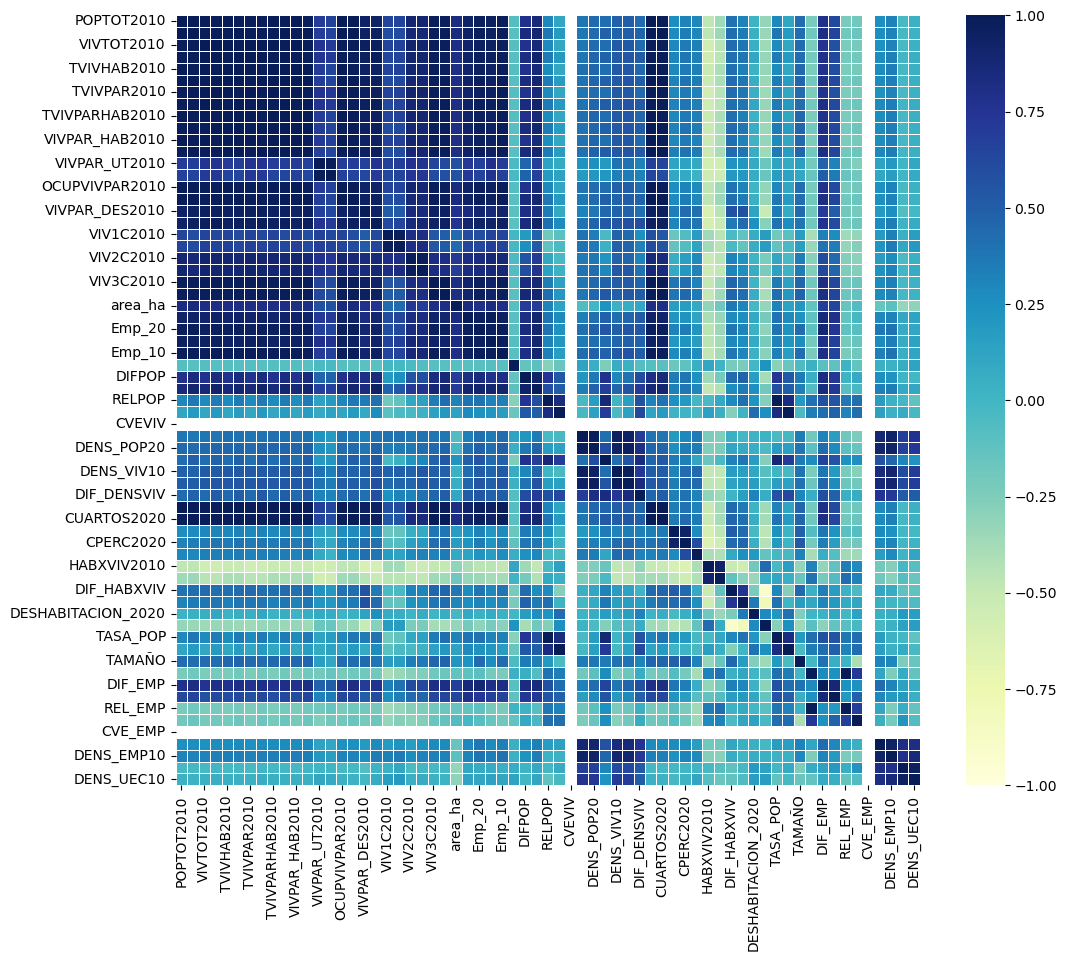

In [219]:
#df a analizar
MAPA_CM_f = MAPA_df_c

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,TVIVPARHAB2020,...,TASA_EMP_MET,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
POPTOT2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POPTOT2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIVTOT2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIVTOT2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TVIVHAB2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_UEC20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


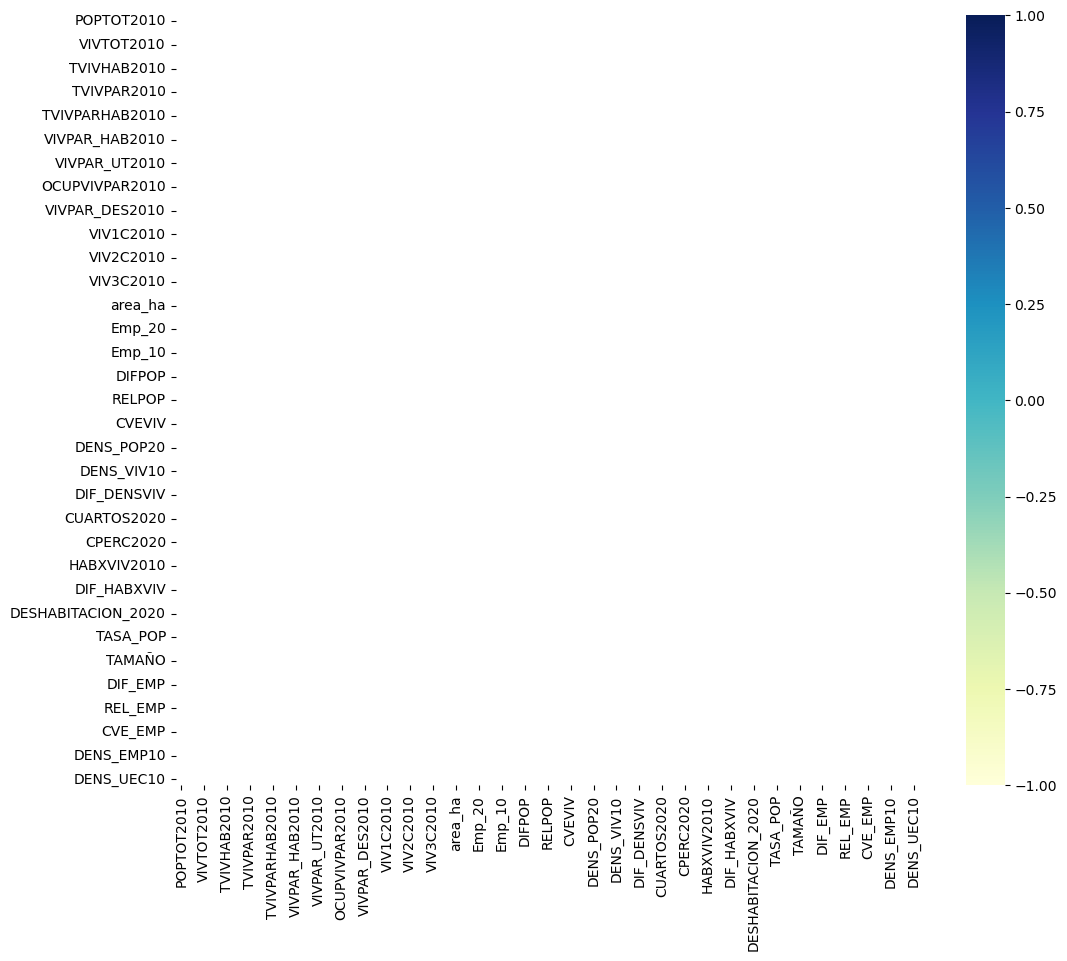

In [220]:
#df a analizar
MAPA_CM_f = MAPA_df_d

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

## Análisis factorial

In [221]:
#limpiar columnas
MAPA_df_continuo = MAPA_df.drop(columns=['CVE_MET', 'NOM_MET', 'TIPO_MET','CVEPOP', 'CVEVIV', 'CVE',
       'TIPOLOGIA','R_DESHAB_2010', 'SUBTIPOLOGÍA', 'CVE_EMP',
       'CVE_UEC', 'CVE_ue', 'TIPOLOGIA_ue',  'R_TAM', 'SUBTIPOLOGÍA_ue'])

#seleccionar micro-db de cada nivel de deshabitación
MAPA_df_a = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'a']
MAPA_df_b = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'b']
MAPA_df_c = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'c']
MAPA_df_d = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'd']

print("FULL: ",len(MAPA_df_continuo))
print("DESHAB A: ",len(MAPA_df_a))
print("DESHAB B: ",len(MAPA_df_b))
print("DESHAB C: ",len(MAPA_df_c))
print("DESHAB D: ",len(MAPA_df_d))

FULL:  92
DESHAB A:  1
DESHAB B:  50
DESHAB C:  41
DESHAB D:  0


In [222]:
# Nombre del archivo y nombre de la pestaña donde deseas guardar los datos
excel_file = r"C:\Users\Alejandro\Downloads\DATA\Factorial\Nacional\Nacional_Factorial_Metro.xlsx"

sheet_name = 'Deshab FULL'
sheet_name_2 = 'Significativo'


Chi square
46318.55687065764 0.0

Modelo KMO
0.8215029955087423



C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Valores propios
[ 3.58600210e+01  7.78500723e+00  5.84032833e+00  4.91166627e+00
  2.23090248e+00  1.27582278e+00  1.11629932e+00  9.22788182e-01
  8.32373474e-01  5.98742125e-01  4.93047706e-01  3.18897019e-01
  1.94368581e-01  1.69048147e-01  1.18596444e-01  1.01454306e-01
  9.41776064e-02  3.61611462e-02  3.34565036e-02  1.65900497e-02
  1.13564985e-02  8.68725527e-03  7.23478791e-03  4.41183447e-03
  4.07347363e-03  3.51496029e-03  2.55080343e-03  2.13953332e-03
  1.61724046e-03  1.22673383e-03  8.46066424e-04  7.05014145e-04
  5.33493824e-04  3.54642027e-04  2.97043074e-04  2.16706533e-04
  1.63825657e-04  1.25484450e-04  8.55303022e-05  4.57727774e-05
  2.76425897e-05  2.10110233e-05  9.45981714e-06  4.87784049e-06
  5.33736331e-07  5.13228619e-07  4.05880232e-07  9.97758498e-08
  3.20434504e-08  1.00464612e-08  2.62252341e-09  3.76966861e-10
  2.03113636e-10  7.22689465e-11  2.42172101e-11  1.51495623e-12
  5.55204565e-13  4.73609014e-15  1.55811351e-15  7.56821818e-16
 -1.95508

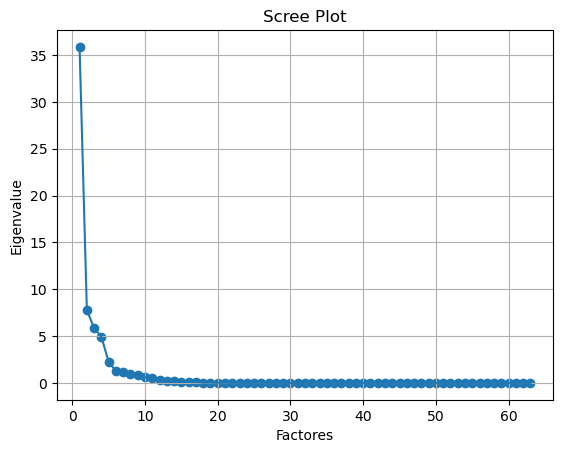

,A1,A2,A3,A4,A5
POPTOT2010,0.989588,-0.027616,0.127537,-0.009583,0.039702
POPTOT2020,0.989078,-0.005559,0.132736,-0.002772,0.057776
VIVTOT2010,0.989725,-0.026496,0.126698,0.012485,0.044833
VIVTOT2020,0.988989,-0.002175,0.136103,0.020057,0.050383
TVIVHAB2010,0.989519,-0.029272,0.124192,-0.000013,0.039624
...,...,...,...,...,...
REL_UEC,-0.055243,0.670622,-0.043662,-0.354777,-0.019755
DENS_EMP20,0.259548,0.132421,0.911856,0.032827,0.032665
DENS_EMP10,0.276431,-0.118049,0.922782,0.080463,-0.031999
DENS_UEC20,0.137596,0.012214,0.785424,-0.320709,-0.301513


,A1,A2,A3,A4,A5
SS Loadings,34.197281,6.939967,6.915113,4.549307,3.233088
Proportion Var,0.542814,0.110158,0.109764,0.072211,0.051319
Cumulative Var,0.542814,0.652972,0.762736,0.834947,0.886266


In [225]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_continuo

# borrar columnas

MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

# #escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=5, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5']#,'A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5']#,'A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [226]:
# Escribir los loadings en la pestaña especificada del archivo Excel
with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
    loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
        
    # Agregar título a la tabla de loadings
    worksheet = writer.sheets[sheet_name]
    worksheet.cell(row=1, column=1, value='Loadings')

print("El archivo Excel ha sido creado y los loadings han sido guardados exitosamente.")

El archivo Excel ha sido creado y los loadings han sido guardados exitosamente.


In [227]:
# Verificar si el archivo ya existe
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        # Cargar el libro de trabajo existente
        book = writer.book

        # Si la hoja ya existe, mostrar mensaje
        if sheet_name_2 in book.sheetnames:
            print(f"La hoja {sheet_name_2} ya existe en el archivo {excel_file}.")
        else:
            # Guardar los loadings en una nueva pestaña
            loadings_df.to_excel(writer, sheet_name=sheet_name_2, startrow=0, index=True)

            # Obtener la hoja de trabajo
            worksheet = writer.sheets[sheet_name_2]

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']

            print(f"Los loadings han sido guardados exitosamente en la nueva pestaña '{sheet_name_2}'.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña 'Significativo'.


### Rango a

In [228]:
sheet_name = 'Deshab A'

In [229]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_a

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [ ]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']
        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


### Rango b

In [230]:
sheet_name = 'Deshab B'

Chi square
inf 0.0

Modelo KMO
nan

Valores propios
[ 3.71681952e+01  8.70694457e+00  5.66954157e+00  4.41932365e+00
  1.79957084e+00  1.18286251e+00  9.28756444e-01  7.99893200e-01
  7.12182786e-01  5.70562456e-01  2.90390742e-01  2.37946441e-01
  1.56370743e-01  1.24783601e-01  8.25298458e-02  5.32231877e-02
  3.43491472e-02  1.90706554e-02  1.30098507e-02  9.73097071e-03
  5.39837330e-03  4.51880224e-03  2.79952147e-03  2.38072578e-03
  1.14359546e-03  9.84258496e-04  7.03476140e-04  6.79944792e-04
  5.79394329e-04  4.55353908e-04  3.82805909e-04  2.26281582e-04
  1.80945984e-04  1.17217212e-04  7.06000049e-05  5.27083867e-05
  3.32073544e-05  2.68350413e-05  1.30081134e-05  7.93471298e-06
  3.76808623e-06  2.11003395e-06  3.47634720e-07  2.52580757e-07
  1.00571634e-07  3.51137899e-08  2.91724639e-08  4.75112538e-09
  1.86473252e-09  2.13821720e-15  1.75221132e-15  1.70602300e-15
  1.04521524e-15  7.54006696e-16  2.48583198e-16  3.34386684e-17
 -1.75200458e-16 -2.56248775e-16 -4.47

C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


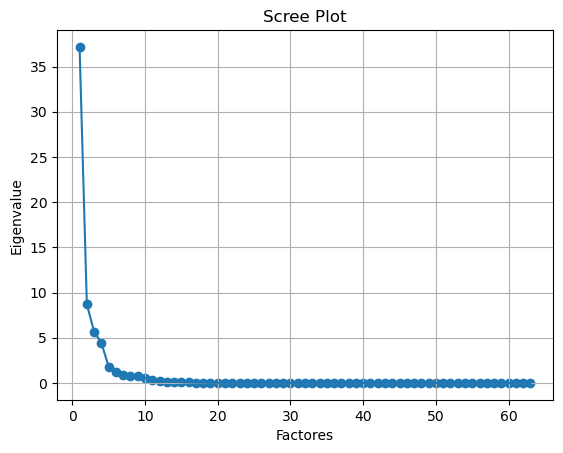

,A1,A2,A3,A4,A5
POPTOT2010,0.986288,-0.046018,0.151052,-0.011526,-0.029574
POPTOT2020,0.986791,-0.028874,0.157096,-0.000881,-0.022299
VIVTOT2010,0.986863,-0.045385,0.147267,0.004306,-0.034036
VIVTOT2020,0.987165,-0.024496,0.155511,0.011347,-0.015993
TVIVHAB2010,0.986649,-0.047217,0.144506,-0.004965,-0.034787
...,...,...,...,...,...
REL_UEC,-0.103464,0.738998,-0.023436,-0.350899,0.022574
DENS_EMP20,0.383115,0.140160,0.859872,-0.019971,0.078157
DENS_EMP10,0.414750,-0.126283,0.857179,-0.041850,0.080498
DENS_UEC20,0.227833,0.036013,0.732585,-0.529253,0.087446


,A1,A2,A3,A4,A5
SS Loadings,35.101307,7.917920,6.298505,5.828951,1.851158
Proportion Var,0.557164,0.125681,0.099976,0.092523,0.029383
Cumulative Var,0.557164,0.682845,0.782821,0.875344,0.904728


In [232]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_b

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=5, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5']#,'A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5']#,'A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [233]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']


        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña Deshab B del archivo Excel.


### Rango c

In [234]:
sheet_name = 'Deshab C'

Chi square
inf 0.0

Modelo KMO
nan

Valores propios
[ 3.38668411e+01  6.90979670e+00  6.81041592e+00  4.26845071e+00
  2.60881219e+00  1.92625798e+00  1.34055496e+00  1.21460835e+00
  1.13994067e+00  8.92046674e-01  5.09121011e-01  4.31492839e-01
  2.43883094e-01  2.07707612e-01  1.46767935e-01  1.14366309e-01
  9.88113927e-02  8.34241908e-02  6.65054852e-02  3.65270655e-02
  2.40194284e-02  1.60675537e-02  1.12820398e-02  8.95364854e-03
  6.87863874e-03  3.83084346e-03  3.48358805e-03  2.69703811e-03
  2.13254865e-03  1.38648557e-03  1.09398056e-03  7.24127222e-04
  3.39650443e-04  2.76606242e-04  1.97746348e-04  1.70678975e-04
  8.29321471e-05  3.26873674e-05  1.25445525e-05  5.02775494e-06
  2.83598359e-15  1.76134465e-15  1.57444557e-15  1.55512659e-15
  1.10273321e-15  1.01722710e-15  9.34956107e-16  5.80743672e-16
  4.96914915e-16  3.23241258e-16  2.33457217e-16  7.24193258e-17
 -7.62358615e-17 -2.40734526e-16 -3.42612903e-16 -4.78131959e-16
 -7.06119216e-16 -7.26452285e-16 -1.08

C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


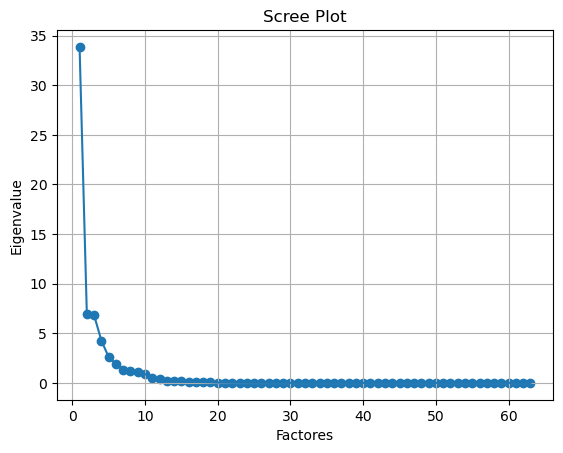

,A1,A2,A3,A4,A5,A6,A7
POPTOT2010,0.979838,0.115647,0.048376,0.096195,-0.080202,0.014394,0.070504
POPTOT2020,0.970726,0.112958,0.131081,0.130896,-0.071804,-0.000848,0.064125
VIVTOT2010,0.964398,0.118783,0.035584,0.143682,-0.087538,0.123636,0.079482
VIVTOT2020,0.956317,0.134171,0.130458,0.134309,-0.081355,0.137591,0.069298
TVIVHAB2010,0.969059,0.136223,0.036409,0.115643,-0.095047,0.059225,0.102053
...,...,...,...,...,...,...,...
REL_UEC,-0.158838,-0.047005,0.397708,0.083613,0.611891,-0.120353,-0.304748
DENS_EMP20,0.138481,0.951994,0.111616,0.054492,0.157791,-0.004958,0.112107
DENS_EMP10,0.202033,0.946617,0.010836,-0.003640,-0.161509,0.008742,0.045252
DENS_UEC20,-0.089954,0.882233,0.044363,-0.019269,0.133055,0.000193,-0.419677


,A1,A2,A3,A4,A5,A6,A7
SS Loadings,30.076163,8.107479,6.239589,4.630767,3.233798,2.640904,1.958122
Proportion Var,0.477399,0.128690,0.099041,0.073504,0.051330,0.041919,0.031081
Cumulative Var,0.477399,0.606090,0.705131,0.778635,0.829965,0.871884,0.902965


In [235]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_c

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [236]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']
        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña Deshab C del archivo Excel.


### Rango d

In [237]:
sheet_name = 'Deshab D'

In [238]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_d

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

# Escalar los datos
scaler = StandardScaler()
MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

# Pruebas de esfericidad de Bartlett y KMO
chi_square_value, p_value = calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square:', chi_square_value, 'p_value:', p_value)

kmo_all, kmo_model = calculate_kmo(MAPA_df_f)
print('Modelo KMO:', kmo_model)

# Análisis factorial
fa = FactorAnalyzer(n_factors=41, rotation=None)
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Crear scree plot
plt.scatter(range(1, MAPA_df_f.shape[1] + 1), ev)
plt.plot(range(1, MAPA_df_f.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Análisis factorial con rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
fa.fit(MAPA_df_f)
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Obtener la varianza de cada factor
fa.get_factor_variance()
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_names, index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])
display(varianza_df)

ValueError: Found array with 0 sample(s) (shape=(0, 63)) while a minimum of 1 is required by StandardScaler.

In [ ]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']



        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


### revisión de datos

In [ ]:
print(MAPA_df.describe())

In [ ]:
for column in MAPA_df.columns:
    nans = MAPA_df[column].isna().sum()
    infs = np.isinf(MAPA_df[column]).sum()
    if nans > 0 or infs > 0:
        print(f"Columna {column} tiene {nans} NaNs y {infs} valores infinitos")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma para cada columna
for column in MAPA_df.columns:
    plt.figure()
    sns.histplot(MAPA_df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

# Heatmap para visualizar correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(MAPA_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de correlación')
plt.show()


# a

# Análisis Municipal

## Tratar DB

In [239]:
# subir pgkg
# Seleccionar nivel de deshabitación: a,b,c,d
#Limpiar columnas no-numéricas


MAPA_ruta = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\DENUE_LOC_NAC\resultados_municipio.xlsx"
MAPA_df = pd.read_excel(MAPA_ruta)

In [240]:
# #limpiar columnas
# MAPA_df_continuo = MAPA_df.drop(columns=['CVE_MET', 'NOM_MET', 'TIPO_MET','CVEPOP', 'CVEVIV', 'CVE',
#        'TIPOLOGIA','R_DESHAB_2010', 'R_DESHAB_2020', 'SUBTIPOLOGÍA', 'CVE_EMP',
#        'CVE_UEC', 'CVE_ue', 'TIPOLOGIA_ue',  'R_TAM', 'SUBTIPOLOGÍA_ue'])

#seleccionar micro-db de cada nivel de deshabitación
MAPA_df_a = MAPA_df[MAPA_df.R_DESHAB_2020 == 'a']
MAPA_df_b = MAPA_df[MAPA_df.R_DESHAB_2020 == 'b']
MAPA_df_c = MAPA_df[MAPA_df.R_DESHAB_2020 == 'c']
MAPA_df_d = MAPA_df[MAPA_df.R_DESHAB_2020 == 'd']

print("FULL: ",len(MAPA_df))
print("DESHAB A: ",len(MAPA_df_a))
print("DESHAB B: ",len(MAPA_df_b))
print("DESHAB C: ",len(MAPA_df_c))
print("DESHAB D: ",len(MAPA_df_d))

FULL:  421
DESHAB A:  17
DESHAB B:  230
DESHAB C:  166
DESHAB D:  8


## Análisis correlacional simple

In [241]:
# Especificar el archivo de salida y el nombre de la hoja
excel_file = r"C:\Users\Alejandro\Downloads\DATA\Factorial\Nacional\Nacional_Correlacional_Mun.xlsx"
sheet_name = 'Correlaciones'
sheet_name_2 = 'Correlaciones Significativas'

,CVEMUN,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,...,TASA_EMP_MUN,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
CVEMUN,1.000000,-0.259792,-0.269939,-0.258831,-0.262599,-0.259667,-0.267435,-0.259525,-0.263086,-0.259638,...,-0.136590,-0.261763,-0.248336,-0.130217,0.005117,-0.053799,-0.227478,-0.197365,-0.188406,-0.182438
POPTOT2010,-0.259792,1.000000,0.987801,0.991715,0.974685,0.997451,0.983679,0.992327,0.975907,0.997464,...,-0.173682,0.848055,0.814855,-0.167030,-0.231020,0.017592,0.429419,0.419584,0.390367,0.406269
POPTOT2020,-0.269939,0.987801,1.000000,0.988428,0.992591,0.985499,0.997151,0.989336,0.992428,0.985502,...,-0.126075,0.884809,0.857847,-0.123324,-0.190728,0.030000,0.397936,0.382190,0.346409,0.357860
VIVTOT2010,-0.258831,0.991715,0.988428,1.000000,0.989005,0.995824,0.991552,0.999890,0.989373,0.995785,...,-0.164128,0.862773,0.810556,-0.157638,-0.225979,0.028938,0.442516,0.431495,0.379868,0.399140
VIVTOT2020,-0.262599,0.974685,0.992591,0.989005,1.000000,0.978064,0.996401,0.989345,0.999392,0.978051,...,-0.118225,0.892230,0.848535,-0.115290,-0.186222,0.039922,0.415509,0.399000,0.341815,0.356964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,-0.053799,0.017592,0.030000,0.028938,0.039922,0.018589,0.031965,0.028974,0.040044,0.018570,...,0.349682,0.103596,0.116022,0.248082,0.183062,1.000000,0.002529,-0.052375,-0.034097,-0.094533
DENS_EMP20,-0.227478,0.429419,0.397936,0.442516,0.415509,0.460122,0.426609,0.440050,0.411831,0.460217,...,-0.167800,0.436214,0.233651,-0.154316,-0.225354,0.002529,1.000000,0.987309,0.866544,0.891798
DENS_EMP10,-0.197365,0.419584,0.382190,0.431495,0.399000,0.450375,0.410606,0.429087,0.396123,0.450464,...,-0.262891,0.379975,0.181059,-0.236137,-0.282836,-0.052375,0.987309,1.000000,0.869971,0.918654
DENS_UEC20,-0.188406,0.390367,0.346409,0.379868,0.341815,0.404896,0.356827,0.379276,0.342015,0.405030,...,-0.235604,0.272719,0.205777,-0.222525,-0.231362,-0.034097,0.866544,0.869971,1.000000,0.975497


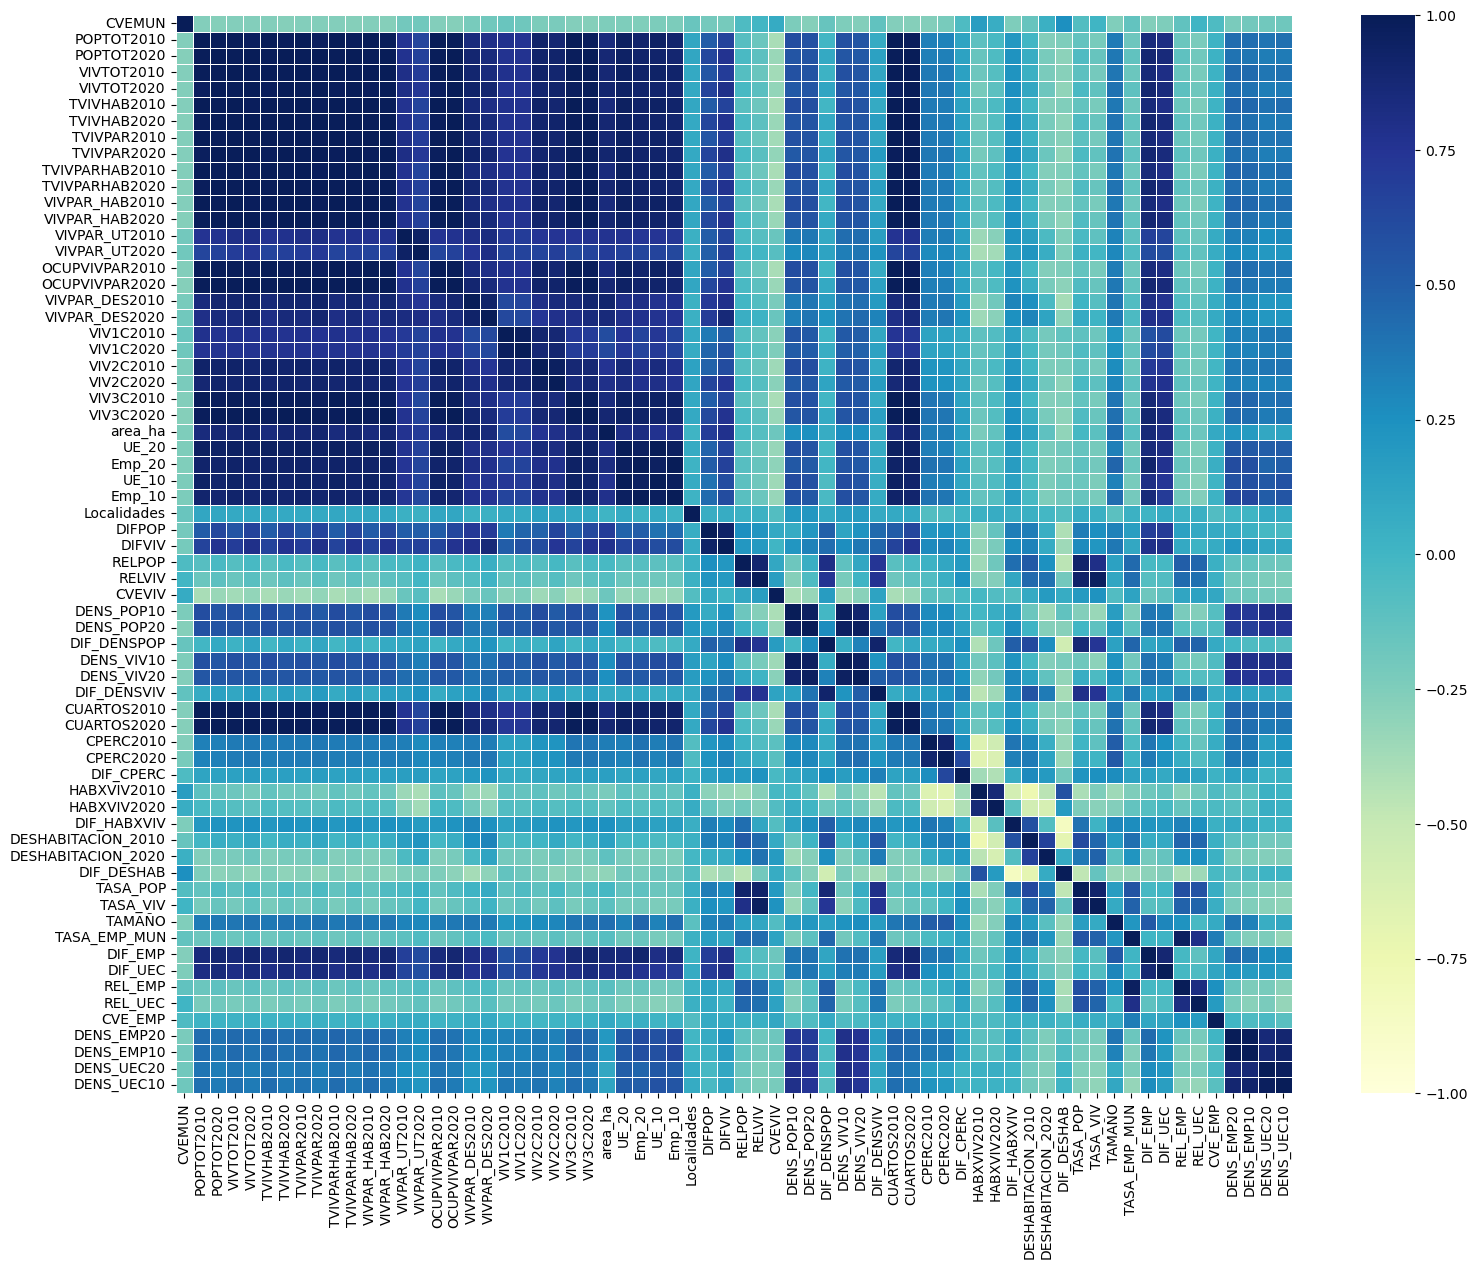

In [242]:
#df a analizar
MAPA_CM_f = MAPA_df

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(18, 14))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

In [243]:
# Guardar las correlaciones en un archivo Excel
with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
    correlaciones.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
    
    # Agregar título a la tabla de correlaciones
    worksheet = writer.sheets[sheet_name]
    worksheet.cell(row=1, column=1, value='Cuadro de Correlaciones')

print("El archivo Excel ha sido creado y las correlaciones han sido guardadas exitosamente.")


El archivo Excel ha sido creado y las correlaciones han sido guardadas exitosamente.


In [244]:
# Umbral de correlaciones significativas
threshold = 0.80

# Verificar si el archivo ya existe
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        # Cargar el libro de trabajo existente
        book = writer.book
        
        # Si la hoja ya existe, mostrar mensaje
        if sheet_name_2 in book.sheetnames:
            print(f"La hoja {sheet_name_2} ya existe en el archivo {excel_file}.")
        else:
            # Filtrar las correlaciones significativas
            correlaciones = pd.read_excel(excel_file, sheet_name=sheet_name, index_col=0)
            significativas = correlaciones[(correlaciones > threshold) | (correlaciones < -threshold)]
            
            # Guardar las correlaciones significativas en una nueva pestaña
            significativas.to_excel(writer, sheet_name=sheet_name_2, startrow=0, index=True)

            # Obtener la hoja de trabajo
            worksheet = writer.sheets[sheet_name_2]

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Necesario para evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a la tabla de correlaciones
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']

            print(f"Las correlaciones significativas han sido guardadas exitosamente en la nueva pestaña {sheet_name_2}.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Las correlaciones significativas han sido guardadas exitosamente en la nueva pestaña Correlaciones Significativas.


### Por deshab

In [ ]:
#df a analizar
MAPA_CM_f = MAPA_df_a

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(18, 14))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()


In [ ]:
#df a analizar
MAPA_CM_f = MAPA_df_b

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(18, 14))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

In [ ]:
#df a analizar
MAPA_CM_f = MAPA_df_c

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(18, 14))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

In [ ]:
#df a analizar
MAPA_CM_f = MAPA_df_d

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(18, 14))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

## Análisis factorial

In [245]:
#limpiar columnas
MAPA_df_continuo = MAPA_df.drop(columns=['CVEMUN','CVE_MET', 'NOM_MET', 'TIPO_MET','CVEPOP', 'CVEVIV', 'CVE',
       'TIPOLOGIA','R_DESHAB_2010', 'SUBTIPOLOGÍA', 'CVE_EMP',
       'CVE_UEC', 'CVE_ue', 'TIPOLOGIA_ue',  'R_TAM', 'SUBTIPOLOGÍA_ue','TIPO_MUN'])

#seleccionar micro-db de cada nivel de deshabitación
MAPA_df_a = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'a']
MAPA_df_b = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'b']
MAPA_df_c = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'c']
MAPA_df_d = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'd']

print("FULL: ",len(MAPA_df_continuo))
print("DESHAB A: ",len(MAPA_df_a))
print("DESHAB B: ",len(MAPA_df_b))
print("DESHAB C: ",len(MAPA_df_c))
print("DESHAB D: ",len(MAPA_df_d))

FULL:  421
DESHAB A:  17
DESHAB B:  230
DESHAB C:  166
DESHAB D:  8


In [246]:
# Nombre del archivo y nombre de la pestaña donde deseas guardar los datos
excel_file = r"C:\Users\Alejandro\Downloads\DATA\Factorial\Nacional\Nacional_Factorial_Mun.xlsx"

sheet_name = 'Deshab FULL'
sheet_name_2 = 'Significativo'

C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Chi square
nan nan

Modelo KMO
0.8806569788095563

Valores propios
[ 3.32317284e+01  8.96264540e+00  5.15311763e+00  3.15848861e+00
  2.13303104e+00  1.68657288e+00  1.36414163e+00  1.16240178e+00
  1.05190544e+00  9.20745501e-01  7.72831851e-01  6.56796109e-01
  5.02401958e-01  4.49942346e-01  2.86528047e-01  2.62773426e-01
  2.13806441e-01  1.50752274e-01  1.39670921e-01  1.21481937e-01
  1.04618442e-01  9.68801466e-02  8.24311680e-02  7.33515685e-02
  5.59583779e-02  4.76617914e-02  4.10546938e-02  2.57585039e-02
  2.41560662e-02  1.49309718e-02  1.08664260e-02  1.01807495e-02
  6.95285573e-03  5.68928758e-03  5.24943004e-03  4.38350514e-03
  3.25383633e-03  1.86265288e-03  9.07400899e-04  8.63785887e-04
  7.13750963e-04  4.18301938e-04  2.63572400e-05  2.49080521e-05
  2.20365383e-05  8.37016236e-06  6.66753745e-06  3.52989848e-06
  4.43339812e-07  3.64345145e-07  1.95466353e-08  5.90100408e-09
  2.00918715e-09  1.24218368e-09  1.36869436e-10  6.41337814e-11
  1.92318580e-11  6.987

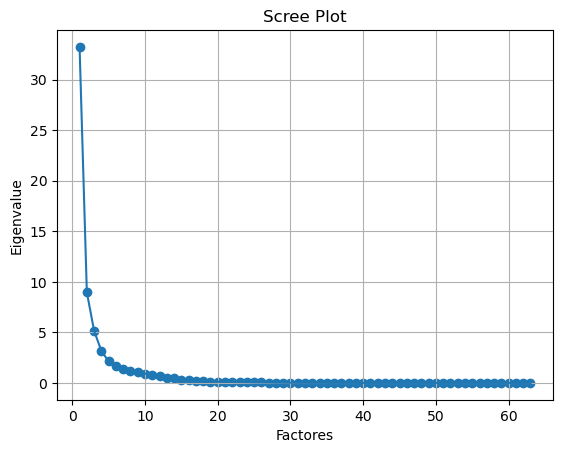

,A1,A2,A3,A4,A5,A6
POPTOT2010,0.952697,0.239649,-0.089812,-0.011217,0.044933,-0.005803
POPTOT2020,0.976537,0.186339,-0.010175,0.010612,0.062143,-0.006666
VIVTOT2010,0.962946,0.222974,-0.077630,0.059333,0.049563,-0.008705
VIVTOT2020,0.978181,0.178892,0.007108,0.089005,0.042930,-0.010538
TVIVHAB2010,0.950004,0.259088,-0.095057,0.016545,0.044919,0.006761
...,...,...,...,...,...,...
REL_UEC,-0.176872,-0.172855,0.553627,-0.060509,0.417039,0.038140
DENS_EMP20,0.265410,0.854070,-0.068366,0.114028,-0.053104,0.263551
DENS_EMP10,0.247545,0.861157,-0.111651,0.121827,-0.105430,0.226570
DENS_UEC20,0.199721,0.877532,-0.109652,-0.058632,-0.094183,-0.016381


,A1,A2,A3,A4,A5,A6
SS Loadings,30.012502,7.944284,6.952193,4.158682,2.579628,1.568297
Proportion Var,0.476389,0.126100,0.110352,0.066011,0.040946,0.024894
Cumulative Var,0.476389,0.602489,0.712841,0.778852,0.819798,0.844692


In [248]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_continuo

# borrar columnas

MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

# #escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [249]:
# Escribir los loadings en la pestaña especificada del archivo Excel
with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
    loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
        
    # Agregar título a la tabla de loadings
    worksheet = writer.sheets[sheet_name]
    worksheet.cell(row=1, column=1, value='Loadings')

print("El archivo Excel ha sido creado y los loadings han sido guardados exitosamente.")

El archivo Excel ha sido creado y los loadings han sido guardados exitosamente.


In [250]:
# Verificar si el archivo ya existe
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        # Cargar el libro de trabajo existente
        book = writer.book

        # Si la hoja ya existe, mostrar mensaje
        if sheet_name_2 in book.sheetnames:
            print(f"La hoja {sheet_name_2} ya existe en el archivo {excel_file}.")
        else:
            # Guardar los loadings en una nueva pestaña
            loadings_df.to_excel(writer, sheet_name=sheet_name_2, startrow=0, index=True)

            # Obtener la hoja de trabajo
            worksheet = writer.sheets[sheet_name_2]

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']

            print(f"Los loadings han sido guardados exitosamente en la nueva pestaña '{sheet_name_2}'.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña 'Significativo'.


### Rango a

In [251]:
sheet_name = 'Deshab A'

Chi square
-inf 1.0

Modelo KMO
nan

Valores propios
[ 3.69589587e+01  1.32320768e+01  4.05241795e+00  2.65676670e+00
  2.00231217e+00  1.41348544e+00  9.18163666e-01  6.64173417e-01
  4.02404957e-01  2.63873149e-01  1.61245501e-01  1.08408166e-01
  5.71207531e-02  5.23300758e-02  3.41990350e-02  2.20634795e-02
  8.25936597e-15  5.31377558e-15  3.58729597e-15  3.29115044e-15
  2.38816538e-15  2.07555441e-15  1.91020431e-15  1.79375247e-15
  1.43919640e-15  1.41112867e-15  1.15912621e-15  1.02845386e-15
  9.35836186e-16  8.10859771e-16  7.84750594e-16  7.30394295e-16
  6.23499510e-16  5.12685235e-16  4.59508660e-16  1.91434106e-16
  1.50235207e-16  1.17705722e-16  4.57399100e-17  3.66466923e-17
 -5.76727711e-17 -1.99965667e-16 -2.13632893e-16 -2.74272182e-16
 -3.41783599e-16 -3.53188539e-16 -5.11386896e-16 -5.90543208e-16
 -6.52366891e-16 -7.77264997e-16 -9.79030340e-16 -1.22103420e-15
 -1.25894973e-15 -1.46959426e-15 -1.54145204e-15 -1.62344044e-15
 -2.09449725e-15 -2.10191633e-15 -2.9

C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


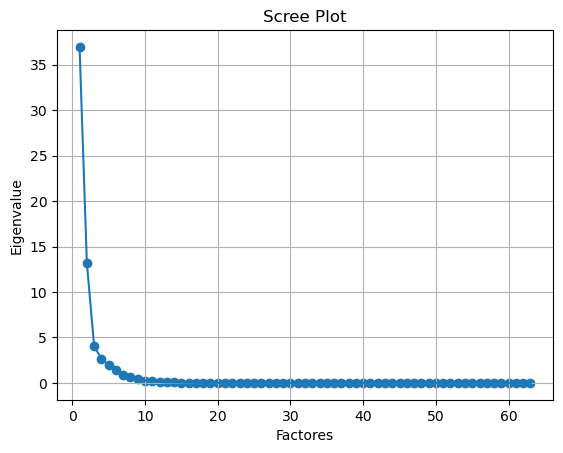

,A1,A2,A3,A4,A5,A6
POPTOT2010,0.944069,0.301709,-0.009814,0.106260,-0.065003,0.027197
POPTOT2020,0.954324,0.193205,0.176960,0.123404,-0.059740,0.036105
VIVTOT2010,0.954250,0.235899,0.071440,0.149378,-0.070617,0.029993
VIVTOT2020,0.947397,0.154252,0.211130,0.164984,-0.071059,0.024785
TVIVHAB2010,0.943496,0.286219,-0.001789,0.146186,-0.073352,0.024929
...,...,...,...,...,...,...
REL_UEC,-0.425323,-0.496817,0.179858,-0.199092,0.696784,-0.089547
DENS_EMP20,0.411386,0.688607,-0.212624,0.452065,0.131885,-0.041619
DENS_EMP10,0.475914,0.749099,-0.239863,0.296106,-0.112435,-0.077009
DENS_UEC20,0.369203,0.891376,-0.141618,-0.077152,-0.099616,0.015157


,A1,A2,A3,A4,A5,A6
SS Loadings,31.383307,10.606825,7.788314,5.255582,3.158028,1.564169
Proportion Var,0.498148,0.168362,0.123624,0.083422,0.050127,0.024828
Cumulative Var,0.498148,0.666510,0.790134,0.873556,0.923683,0.948511


In [254]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_a

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [255]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']
        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña Deshab A del archivo Excel.


### Rango b

In [256]:
sheet_name = 'Deshab B'

C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Chi square
nan nan

Modelo KMO
0.8737576574962571

Valores propios
[ 3.44839493e+01  7.35121441e+00  5.41053055e+00  3.50057994e+00
  2.19887504e+00  1.75348898e+00  1.32097967e+00  1.20836438e+00
  1.10668173e+00  8.73683357e-01  6.54422063e-01  6.15272414e-01
  5.00164948e-01  3.57329798e-01  2.76476464e-01  2.66071779e-01
  2.23051630e-01  1.91753751e-01  1.54144997e-01  1.25864062e-01
  7.79526571e-02  6.92093907e-02  6.31189711e-02  4.86275204e-02
  3.84571034e-02  3.38051784e-02  1.88814710e-02  1.76179025e-02
  1.32429717e-02  1.07845062e-02  8.07473232e-03  6.71260168e-03
  5.29627978e-03  3.93344675e-03  3.51079467e-03  2.71281865e-03
  2.32238145e-03  1.25994370e-03  6.37083998e-04  3.55060236e-04
  2.42355920e-04  2.20828973e-04  7.27571131e-05  2.33762999e-05
  1.64303298e-05  5.69593944e-06  4.23871536e-06  1.56941780e-06
  3.99631365e-07  2.49833136e-07  1.02545965e-08  5.31686322e-09
  9.58822998e-10  1.29801958e-10  1.22330212e-10  3.97853751e-11
  7.91685896e-12  1.350

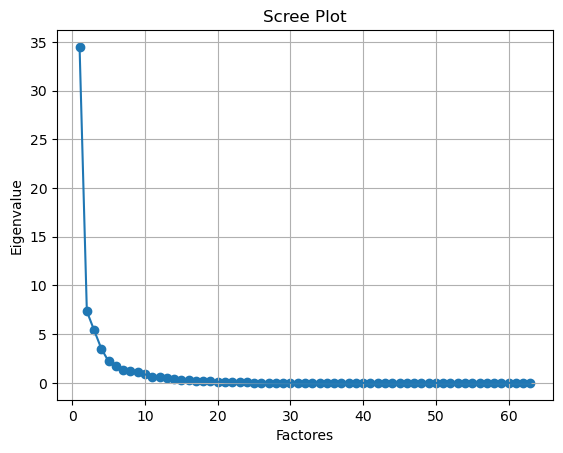

,A1,A2,A3,A4,A5,A6,A7
POPTOT2010,0.967308,0.179027,-0.085444,0.065231,0.072000,-0.017774,0.023870
POPTOT2020,0.976451,0.147340,-0.002705,0.069318,0.105874,-0.024615,0.034551
VIVTOT2010,0.963231,0.180996,-0.072032,0.121315,0.096138,-0.029243,0.024569
VIVTOT2020,0.971949,0.159085,0.012359,0.124744,0.101600,-0.034648,0.032021
TVIVHAB2010,0.961222,0.203219,-0.083827,0.106771,0.073904,-0.025656,0.018081
...,...,...,...,...,...,...,...
REL_UEC,-0.182998,-0.166312,0.304573,-0.222970,-0.000722,0.639394,0.031570
DENS_EMP20,0.214029,0.862431,0.016727,0.278092,-0.082341,-0.055662,-0.188895
DENS_EMP10,0.194891,0.864871,-0.015098,0.261028,-0.101936,-0.124733,-0.191984
DENS_UEC20,0.150298,0.893827,-0.024236,0.033774,-0.100667,-0.092739,0.000709


,A1,A2,A3,A4,A5,A6,A7
SS Loadings,30.516869,8.152523,5.193420,4.298381,2.854905,2.478281,1.495643
Proportion Var,0.484395,0.129405,0.082435,0.068228,0.045316,0.039338,0.023740
Cumulative Var,0.484395,0.613800,0.696235,0.764463,0.809779,0.849117,0.872857


In [257]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_b

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [258]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']
        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña Deshab B del archivo Excel.


### Rango c

In [259]:
sheet_name = 'Deshab C'

C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Chi square
nan nan

Modelo KMO
0.8545138121360442

Valores propios
[ 3.31626750e+01  1.05750227e+01  4.22502346e+00  3.07667634e+00
  1.98279013e+00  1.81901288e+00  1.54389423e+00  1.20801621e+00
  9.36858538e-01  8.29621930e-01  7.56583998e-01  6.48309064e-01
  5.14215865e-01  3.50990888e-01  3.06299551e-01  2.02658112e-01
  1.76459139e-01  1.35757746e-01  1.08904932e-01  7.50786136e-02
  7.04423331e-02  5.54549884e-02  4.06712291e-02  3.80105925e-02
  3.27004809e-02  2.77331014e-02  2.17089882e-02  1.94303314e-02
  9.95756925e-03  9.30201027e-03  8.92925116e-03  7.82797293e-03
  5.66464706e-03  5.10556266e-03  3.67523104e-03  2.72736629e-03
  2.17524284e-03  1.64412181e-03  8.15868268e-04  5.25985228e-04
  3.65101004e-04  2.24280085e-04  2.04738211e-05  1.54385210e-05
  8.47353778e-06  6.40700016e-06  4.76893701e-06  2.46749840e-06
  3.57397801e-07  3.38460571e-08  8.29021775e-09  2.05052793e-09
  1.84974382e-09  6.49954301e-10  2.67795552e-10  7.46462720e-11
  3.77356758e-11  1.311

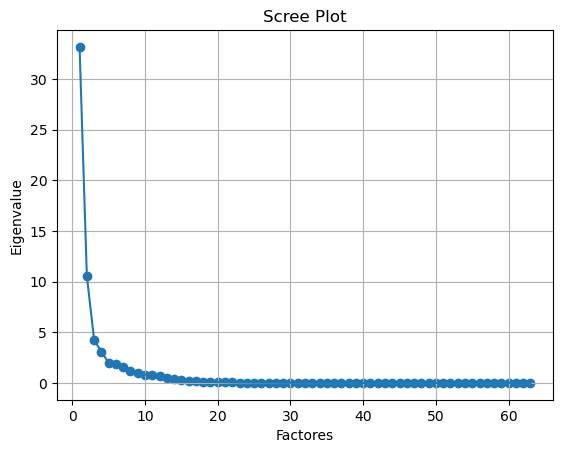

,A1,A2,A3,A4,A5,A6
POPTOT2010,0.968337,-0.039476,0.190061,-0.037532,0.066066,0.091593
POPTOT2020,0.976274,0.108882,0.148764,0.033200,0.084787,-0.018230
VIVTOT2010,0.970567,-0.016836,0.161964,-0.011002,0.104896,0.119705
VIVTOT2020,0.972877,0.115282,0.132876,0.029451,0.118018,0.034867
TVIVHAB2010,0.964377,-0.043956,0.190520,-0.040473,0.086519,0.099571
...,...,...,...,...,...,...
REL_UEC,-0.135241,0.300821,-0.127303,0.751538,-0.039302,-0.034163
DENS_EMP20,0.402888,-0.121831,0.825573,-0.075787,-0.002467,-0.064199
DENS_EMP10,0.417519,-0.180807,0.789234,-0.245152,0.019384,0.011374
DENS_UEC20,0.163358,-0.146804,0.876476,-0.110760,-0.146041,0.011109


,A1,A2,A3,A4,A5,A6
SS Loadings,30.267300,6.935070,6.296038,4.649322,3.720955,2.018553
Proportion Var,0.480433,0.110080,0.099937,0.073799,0.059063,0.032041
Cumulative Var,0.480433,0.590514,0.690451,0.764250,0.823312,0.855353


In [261]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_c

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [262]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']
        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")

Los loadings han sido guardados exitosamente en la nueva pestaña Deshab C del archivo Excel.


### Rango d

In [263]:
sheet_name = 'Deshab D'

Chi square: -inf p_value: 1.0
Modelo KMO: nan
Valores propios
[ 3.76142359e+01  1.04765084e+01  5.45892595e+00  3.94283125e+00
  2.94340756e+00  1.77585253e+00  7.88238320e-01  7.64126381e-15
  4.77664332e-15  3.45329160e-15  3.24796952e-15  2.98622018e-15
  2.65025476e-15  1.93292730e-15  1.87230792e-15  1.51155346e-15
  1.33505989e-15  1.30519558e-15  1.23975522e-15  1.16768702e-15
  1.08358490e-15  9.06108724e-16  8.60571639e-16  7.00203989e-16
  6.04487170e-16  5.87199435e-16  5.65488395e-16  4.90236814e-16
  3.25000323e-16  2.60493012e-16  2.31930588e-16  1.04309858e-16
  8.04897737e-17  2.50088856e-17  5.11401418e-18 -4.93612693e-17
 -1.04598672e-16 -2.84610127e-16 -2.86896205e-16 -2.96845267e-16
 -4.64015726e-16 -4.68873676e-16 -6.18954805e-16 -6.57117210e-16
 -7.71781200e-16 -8.71512380e-16 -1.01767231e-15 -1.20900717e-15
 -1.29706448e-15 -1.31918452e-15 -1.39034322e-15 -1.46328285e-15
 -1.58789989e-15 -1.94540019e-15 -1.98615696e-15 -2.45683382e-15
 -2.82504464e-15 -3.04580531

C:\Users\Alejandro\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


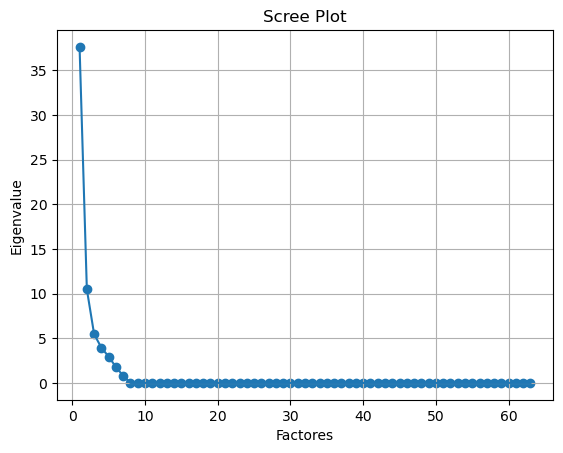

,A1,A2,A3,A4,A5,A6
POPTOT2010,0.939731,0.051731,0.140305,-0.199926,0.233262,0.021377
POPTOT2020,0.978800,0.119529,0.113314,-0.104148,0.059607,0.013819
VIVTOT2010,0.951518,0.204469,0.101240,0.014521,0.182517,0.094529
VIVTOT2020,0.977573,0.128798,0.119061,0.057829,0.037269,0.090341
TVIVHAB2010,0.945553,0.095794,0.162699,-0.115554,0.234987,0.023897
...,...,...,...,...,...,...
REL_UEC,-0.058848,0.927539,0.080436,0.294331,0.096256,-0.139740
DENS_EMP20,0.357774,0.186768,0.890569,-0.131039,0.132774,0.090282
DENS_EMP10,0.392135,-0.138608,0.902320,-0.068459,0.081887,0.033733
DENS_UEC20,0.576308,0.133853,0.743418,-0.085871,0.278011,0.114463


,A1,A2,A3,A4,A5,A6
SS Loadings,33.653790,9.656067,6.146305,5.739869,4.893344,1.981863
Proportion Var,0.534187,0.153271,0.097560,0.091109,0.077672,0.031458
Cumulative Var,0.534187,0.687458,0.785018,0.876127,0.953800,0.985258


In [265]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_d

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

# Escalar los datos
scaler = StandardScaler()
MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

# Pruebas de esfericidad de Bartlett y KMO
chi_square_value, p_value = calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square:', chi_square_value, 'p_value:', p_value)

kmo_all, kmo_model = calculate_kmo(MAPA_df_f)
print('Modelo KMO:', kmo_model)

# Análisis factorial
fa = FactorAnalyzer(n_factors=41, rotation=None)
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Crear scree plot
plt.scatter(range(1, MAPA_df_f.shape[1] + 1), ev)
plt.plot(range(1, MAPA_df_f.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Análisis factorial con rotación Varimax
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(MAPA_df_f)
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6']#, 'A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Obtener la varianza de cada factor
fa.get_factor_variance()
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_names, index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])
display(varianza_df)

In [266]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']
        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")

Los loadings han sido guardados exitosamente en la nueva pestaña Deshab D del archivo Excel.


### revisión de datos

In [ ]:
print(MAPA_df.describe())

In [ ]:
for column in MAPA_df.columns:
    nans = MAPA_df[column].isna().sum()
    infs = np.isinf(MAPA_df[column]).sum()
    if nans > 0 or infs > 0:
        print(f"Columna {column} tiene {nans} NaNs y {infs} valores infinitos")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma para cada columna
for column in MAPA_df.columns:
    plt.figure()
    sns.histplot(MAPA_df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

# Heatmap para visualizar correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(MAPA_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de correlación')
plt.show()


# a